<a href="https://colab.research.google.com/github/mattematica/passion-stats-python/blob/main/unit4_chisquarred_classactivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Header Block

In [2]:
# This header will be the same no matter what code you are using
# import modules that we will use multiple functions from and give them short names. 

import pandas as pd;
import numpy as np;
import seaborn as sb;
import matplotlib.pyplot as plt;


# import single functions

from scipy.stats.contingency import chi2_contingency;
from itertools import combinations;
from statsmodels.graphics.mosaicplot import mosaic;
from scipy.stats.contingency import chi2_contingency;
from scipy.stats import pearsonr;
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as multi

# Data Management

In [3]:
# Importing Variables
addhealth_url = 'https://drive.google.com/uc?export=download&id=1LOoZl4utpqTfKjj6nu70RH16frFLyPfm'
myData = pd.read_csv(addhealth_url,usecols=['H4ID8','H4ID11'],low_memory=False)


#Renaming Variables

myData.rename(columns={
    'H4ID8':'CAR_ACCIDENT',
    'H4ID11':'PAIN_RELIEF',
},inplace=True)

# Dealing with non-responses and legit-skips

myData['PAIN_RELIEF'].replace({
    6:np.nan,
    8:np.nan,
},inplace=True)

myData['CAR_ACCIDENT'].replace({
    8:np.nan,
},inplace=True)

# Collapsing Varibles/Creating Secondary Variables/Dealing with Time


# Text Labels

myData['CAR_ACCIDENT'].replace({
    0.0:'No',
    1.0:'Yes',
},inplace=True)

myData['PAIN_RELIEF'].replace({
    0.0:'No',
    1.0:'Yes',
},inplace=True)

# Everything Else

In [4]:
pd.crosstab(myData['PAIN_RELIEF'],myData['CAR_ACCIDENT'], margins=True)

CAR_ACCIDENT,No,Yes,All
PAIN_RELIEF,,,
No,3910,449,4359
Yes,663,89,752
All,4573,538,5111


(<Figure size 432x288 with 3 Axes>,
 {('No', 'No'): (0.0, 0.0, 0.8486232504081044, 0.8940146746449663),
  ('No', 'Yes'): (0.0,
   0.897336933781179,
   0.8486232504081044,
   0.10266306621882096),
  ('Yes', 'No'): (0.8535983747862138,
   0.0,
   0.14640162521378627,
   0.8787198699370891),
  ('Yes', 'Yes'): (0.8535983747862138,
   0.8820421290733017,
   0.14640162521378627,
   0.11795787092669821)})

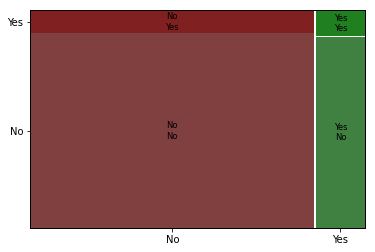

In [5]:
mosaic(data=myData, index=['PAIN_RELIEF','CAR_ACCIDENT'])

In [8]:
ct = pd.crosstab(myData['PAIN_RELIEF'],myData['CAR_ACCIDENT'])
test_stat, p_val, degfree, expected = chi2_contingency(ct)
print(f"Test-Stat={test_stat}, P-Value={p_val}")

Test-Stat=1.4448373805142132, P-Value=0.22935814839777957
